In [31]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
df = pd.read_csv('blood_pressure.csv')
df['Diff'] = df['After'] - df['Before']
compare = df[['Before', 'After', 'Diff']]
compare.head(10)

,Before,After,Diff
0,143,153,10
1,163,170,7
2,153,168,15
3,153,142,-11
4,146,141,-5
5,150,147,-3
6,148,133,-15
7,153,141,-12
8,153,131,-22
9,158,125,-33


In [34]:
compare.describe()

,Before,After,Diff
count,120.000000,120.000000,120.000000
mean,156.450000,151.358333,-5.091667
std,11.389845,14.177622,16.713601
min,138.000000,125.000000,-45.000000
25%,147.000000,140.750000,-18.000000
50%,154.500000,149.500000,-3.500000
75%,164.000000,161.000000,7.000000
max,185.000000,185.000000,41.000000


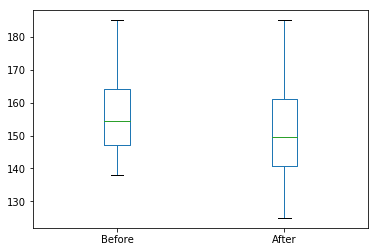

In [40]:
# Assumption Check: Outliers
df[['Before', 'After']].plot(kind='box')
plt.show()

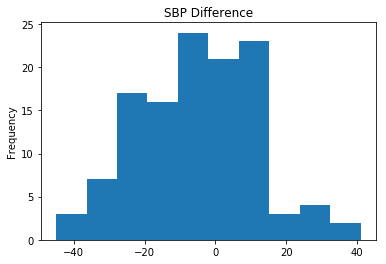

In [36]:
# Assumption Check: Normal Distribution
df['Diff'].plot('hist', title='SBP Difference')
plt.show()

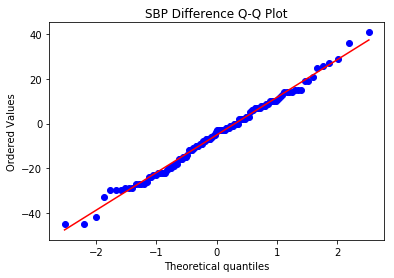

In [37]:
# Check for normally distributed data 
# with Q-Q plot.
stats.probplot(df['Diff'], plot=plt)
plt.title('SBP Difference Q-Q Plot')
plt.show()

In [38]:
# Shapiro-Wilk test for normality 
# (W-test value, p-value)
stats.shapiro(df['Diff'])

(0.9926842451095581, 0.7841846942901611)

In [39]:
# The findings are statistically significant! 
# One can reject the null hypothesis in support of the alternative.
stats.ttest_rel(df['Before'], df['After'])

Ttest_relResult(statistic=3.3371870510833657, pvalue=0.0011297914644840823)

In [46]:
pvalue = 0.0011
print(-pvalue < -0.025 or pvalue > 0.025)

False


## Interpretation of the Results
A paired sample t-test was used to analyze the blood pressure before and after the intervention to test if the intervention had a significant affect on the blood pressure. The blood pressure before the intervention was higher (156.45 ± 11.39 units) compared to the blood pressure post intervention (151.36 ± 14.18 units); there was a statistically significant decrease in blood pressure (t(119)=3.34, p= 0.0011) of 5.09 units.